# Image Sharpening Techniques in OpenCV

In this notebook, we will explore **image sharpening** using different techniques. Sharpening enhances edges and fine details in an image, making it appear clearer and more defined.

We will use the image located at:  
`assets/Image.png`

Sharpening methods we will cover:
1. Kernel-based Sharpening
2. Unsharp Masking
3. High-Pass Filtering
4. Laplacian Sharpening
5. Final Comparison of All Methods

# Import Libraries and Image

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Utility function to display images side by side
def show_side_by_side(title1, img1, title2, img2):
    plt.figure(figsize=(10,5))

    # Left Image
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis("off")

    # Right Image
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis("off")
    
    plt.show()

# Load image
image = cv2.imread("assets/image.jpeg")

## 1. Sharpening Using a Custom Kernel

This method uses a **convolution kernel** to enhance edges.  
A common sharpening kernel is:

$$
K = \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0
\end{bmatrix}
$$


- The central value (5) increases the contribution of the center pixel.  
- The negative values subtract surrounding pixels.  

### Variable to change:
- The **center weight** (e.g., 5 → 7) increases sharpening intensity.  
- The surrounding **negative values** (e.g., -1 → -2) make edges stronger. 

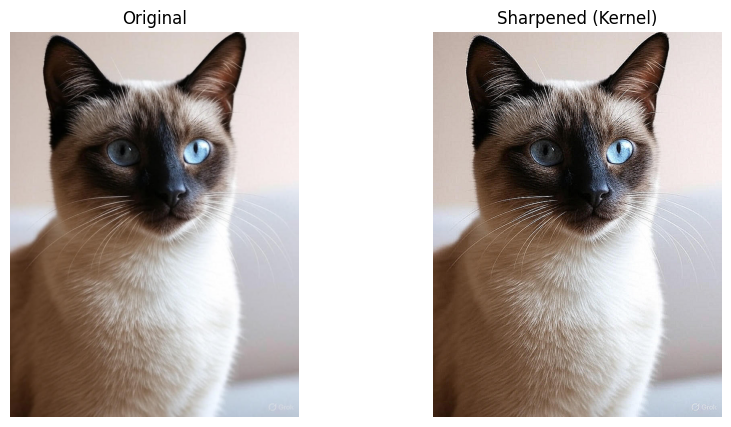

In [4]:
# Sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

sharpened_kernel = cv2.filter2D(image, -1, kernel)
show_side_by_side("Original", image, "Sharpened (Kernel)", sharpened_kernel)

## 2. Sharpening Using Unsharp Masking

Unsharp masking subtracts a blurred version of the image from the original:

$$
S = O + \\alpha (O - B)
$$

Where:  
- **O** = Original image  
- **B** = Blurred image  
- **\\alpha** = sharpening amount  

### Variables to change:
- **\\alpha** (amount): higher = more sharpness.  
- **Blur kernel size**: larger kernel → smoother blur → stronger edges.

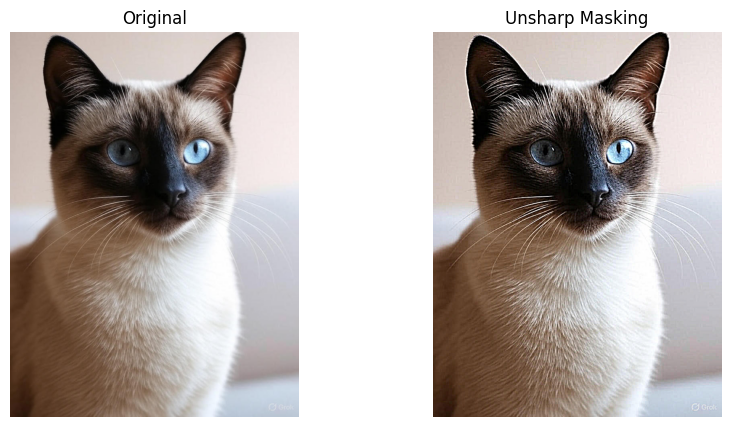

In [5]:
# Apply Gaussian Blur
blurred = cv2.GaussianBlur(image, (9,9), 10)

# Unsharp Mask
alpha = 1.5  # higher = more sharpness
unsharp = cv2.addWeighted(image, 1 + alpha, blurred, -alpha, 0)

show_side_by_side("Original", image, "Unsharp Masking", unsharp)


## 3. High-Pass Filtering

A high-pass filter keeps edges and removes smooth areas.  
It works by subtracting a blurred image from the original:

$$
HPF = O - B
$$

Sharpened image:

$$
S = O + HPF
$$

### Variables to change:
- **Blur kernel size**: larger → stronger sharpening effect.  
- Optionally, scale the high-pass component for more intensity.

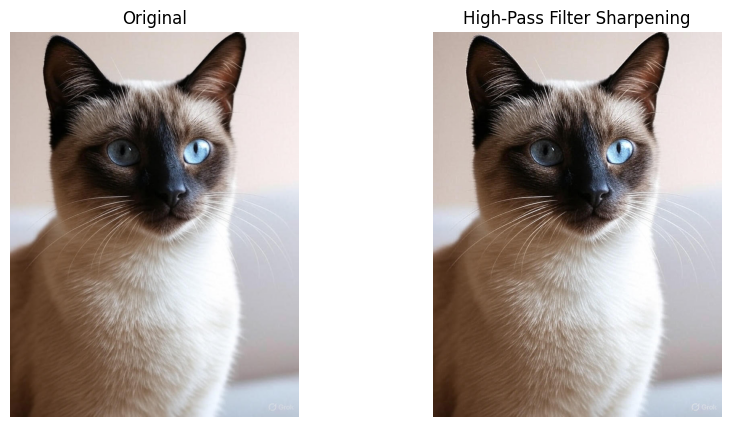

In [6]:
# High Pass Filter
gaussian_blur = cv2.GaussianBlur(image, (7,7), 0)
high_pass = cv2.subtract(image, gaussian_blur)
hpf_sharpened = cv2.add(image, high_pass)

show_side_by_side("Original", image, "High-Pass Filter Sharpening", hpf_sharpened)


## 4. Laplacian Sharpening

The Laplacian operator detects edges by calculating the second derivative of intensity changes.  
The sharpened image is obtained by subtracting the Laplacian from the original:

$$
S = O - \\lambda L
$$

Where:  
- **O** = Original image  
- **L** = Laplacian result  
- **_lambda_** = scaling factor controlling sharpening strength  

### Variables to change:
- **_lambda_ (scaling factor)**: higher values → more edge enhancement.  
- Kernel size of the Laplacian operator. 

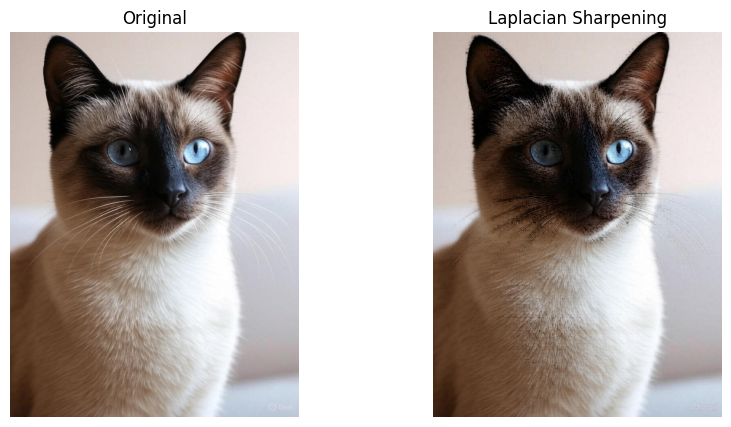

In [7]:
# Laplacian Sharpening
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)
laplacian_sharp = cv2.subtract(image, laplacian)

show_side_by_side("Original", image, "Laplacian Sharpening", laplacian_sharp)


## 5. Comparison of All Sharpening Methods

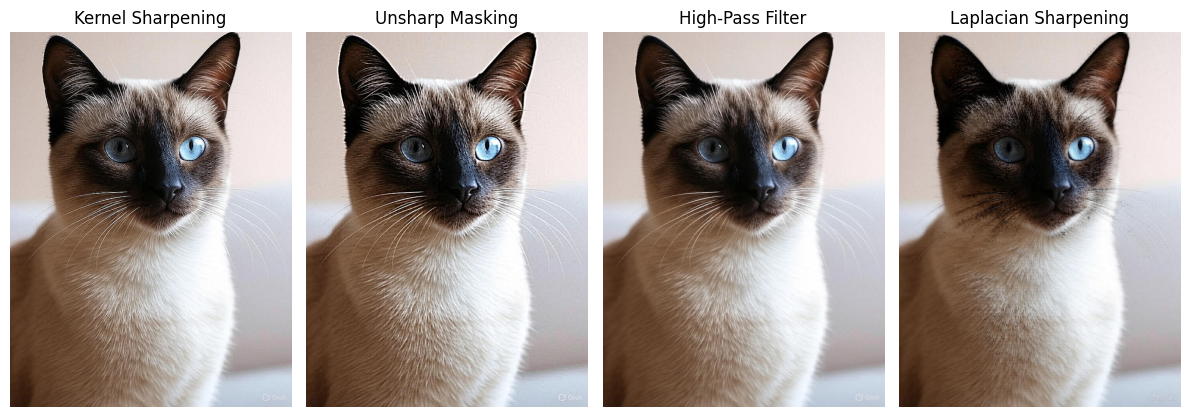

In [9]:
# Apply all sharpening methods
methods = {
    "Kernel Sharpening": sharpened_kernel,
    "Unsharp Masking": unsharp,
    "High-Pass Filter": hpf_sharpened,
    "Laplacian Sharpening": laplacian_sharp
}

plt.figure(figsize=(12,8))

for i, (name, img) in enumerate(methods.items(), 1):
    plt.subplot(1,4,i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(name)
    plt.axis("off")

plt.tight_layout()
plt.show()
